
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,79.12,55.34,28.11,10.11,15.76,9.24,5.12,17.34,28.11,1.62
1,DIA,DJIA ETF,US Stocks:Large Cap,112.98,63.38,16.99,9.45,12.49,8.34,4.34,16.67,16.99,1.02
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,86.30,72.44,58.53,10.11,22.56,11.25,6.11,22.19,58.53,2.64
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,95.12,58.25,28.04,8.54,15.25,10.24,5.35,17.45,28.04,1.61
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,313.28,68.77,19.45,1.71,10.11,22.93,9.46,21.18,19.45,0.92
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,188.43,54.71,17.80,7.69,12.50,18.20,7.75,19.74,17.80,0.90
6,IWD,Russell 1000 Value ETF,US Stocks:Value,111.79,43.67,12.68,9.02,10.88,12.26,6.45,16.51,12.68,0.77
7,IWF,Russell 1000 Growth ETF,US Stocks,69.26,70.11,45.28,8.69,19.45,9.99,5.42,20.59,45.28,2.20
8,RSP,S&P 500 Equal Weight ETF,US Stocks,144.36,56.26,15.25,9.46,13.68,13.52,6.66,18.20,15.25,0.84
9,NOBL,S&P 500 Aristocrats,US Stocks:Large Cap,107.57,37.34,8.59,8.27,11.83,11.65,6.42,16.85,8.59,0.51


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
12,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,56.23,52.27,57.11,3.41,12.91,12.09,5.08,20.92,57.11,2.73
16,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,66.40,91.75,59.89,14.82,26.92,11.40,6.90,22.69,59.89,2.64
21,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,100.80,53.31,42.85,4.66,13.88,12.80,6.95,24.71,42.85,1.73
15,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,158.57,63.36,19.11,10.72,14.26,11.33,6.08,20.17,19.11,0.95
14,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,111.47,68.40,13.29,11.02,12.05,11.42,6.56,20.83,13.29,0.64
18,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,201.39,99.40,13.81,6.93,8.91,19.19,6.62,21.83,13.81,0.63
11,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,91.44,44.61,12.88,8.47,13.52,13.56,7.60,21.56,12.88,0.60
20,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,93.11,28.21,2.81,8.54,11.80,10.61,5.75,14.52,2.81,0.19
13,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,9.31,-23.10,1.04,35.80,13.44,18.33,9.48,30.23,1.04,0.03
17,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,55.35,23.76,-0.88,4.97,10.19,13.29,8.52,14.57,-0.88,-12.82


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLC,XLK,XLY,XLI,XLF,XLRE,XLB,XLV,XLE,XLP,XLU,All S&P500 Sectors Portfolio
Annual Returns,57.11,59.89,42.85,19.11,13.29,13.81,12.88,2.81,1.04,-0.88,-7.40,21.88
Std Dev,20.92,22.69,24.71,20.17,20.83,21.83,21.56,14.52,30.23,14.57,17.93,15.76
Sharpe Ratio,2.73,2.64,1.73,0.95,0.64,0.63,0.60,0.19,0.03,-12.82,-132.68,1.39
Weight,0.12,0.09,0.09,0.10,0.10,0.10,0.08,0.11,0.07,0.07,0.07,1.00
Worst Typical Down Year,15.27,14.51,-6.57,-21.23,-28.37,-29.85,-30.24,-26.23,-59.42,-30.02,-43.26,-9.65
Black Swan,-5.65,-8.18,-31.28,-41.40,-49.20,-51.68,-51.80,-40.75,-89.65,-44.59,-61.19,-25.41


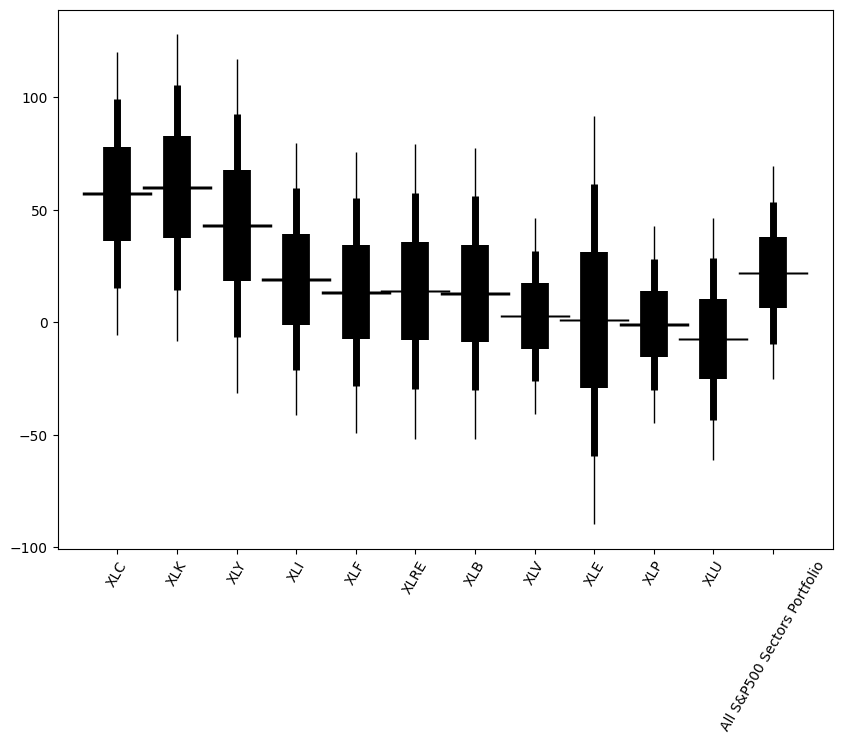

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

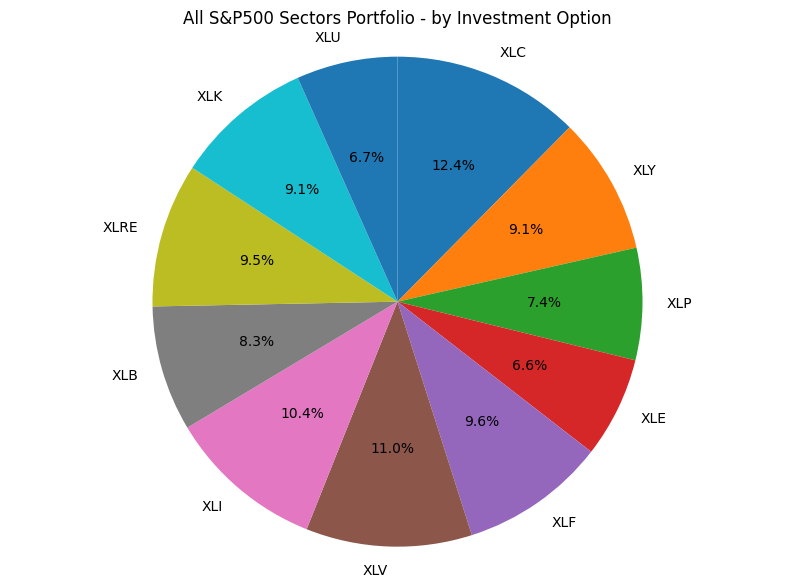

XLC    0.12
XLY    0.09
XLP    0.07
XLE    0.07
XLF    0.10
XLV    0.11
XLI    0.10
XLB    0.08
XLRE   0.10
XLK    0.09
XLU    0.07



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLC                            0.1240
    XLK                            0.0913
    XLY                            0.0906
    XLI                            0.1036
    XLF                            0.0960
    XLRE                           0.0951
    XLB                            0.0829
    XLV                            0.1095
    XLE                            0.0664
    XLP                            0.0739
    XLU                            0.0667


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer............

All S&P500 Sectors Portfolio Metrics:         
    max_sharpe_ratio                      2.26
    annual_return                        39.20
    std_dev                              17.31
    worst typical down year               4.58
    black_swan                          -12.73


All S&P500 Sectors Portfolio Weights:
    XLC                            0.3100
    XLK                            0.3000
    XLY                            0.0000
    XLI                            0.0600
    XLF                            0.1000
    XLRE                           0.0300
    XLB                            0.0700
    XLV                            0.0300
    XLE                            0.0000
    XLP                            0.0600
    XLU                            0.0400



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).